In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate(n=1024, periods=4, coef=0.5):
    ### original dataset
    x = np.random.normal(size=(n, 2))
    r = np.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2)

    y = np.random.binomial(1, p=1 - np.minimum(np.maximum(r - 1, 0), 1))
    
    ### periods = 0 correspond to the original problem
    if periods == 0:
        return x, y
    
    theta = np.arctan2(x[:, 1], x[:, 0])
    
    r *= (1 + (np.cos(theta * periods) + 1) * coef / 2)
    
    return np.vstack([
        r * np.cos(theta),
        r * np.sin(theta)
    ]).T, y

In [3]:
def gen_and_plot(n=32 * 1024, periods=4, coef=0.5):
    x, y = generate(n=n, periods=periods, coef=coef)

    plt.figure(figsize=(8, 8))
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='green', alpha=1024 / n, label='good')
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', alpha=1024 / n, label='anomaly')
    plt.ylim([-4, 4])
    plt.xlim([-4, 4])
    plt.legend()
    plt.show()

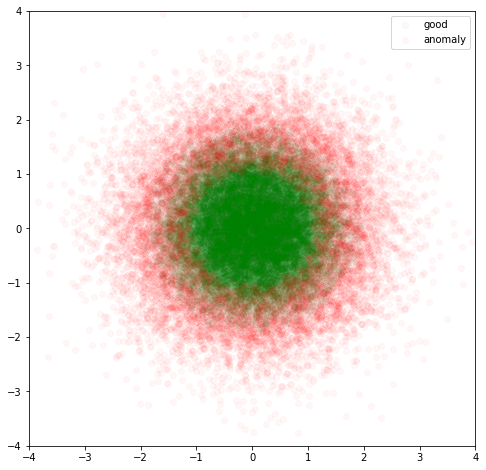

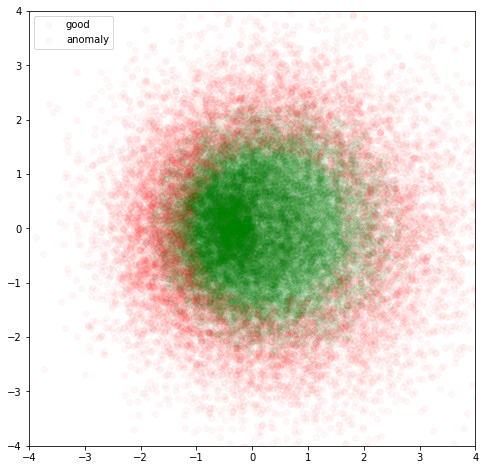

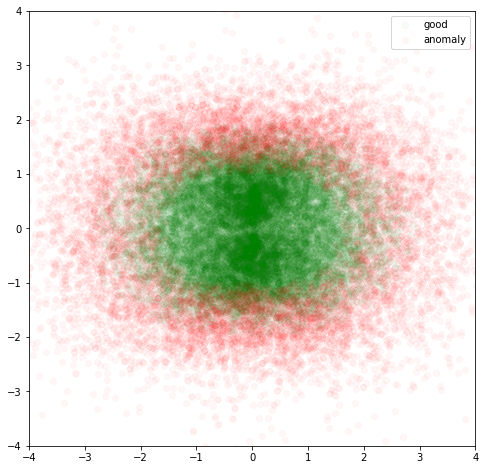

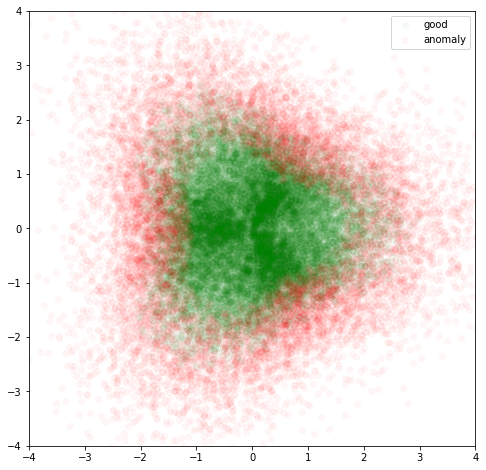

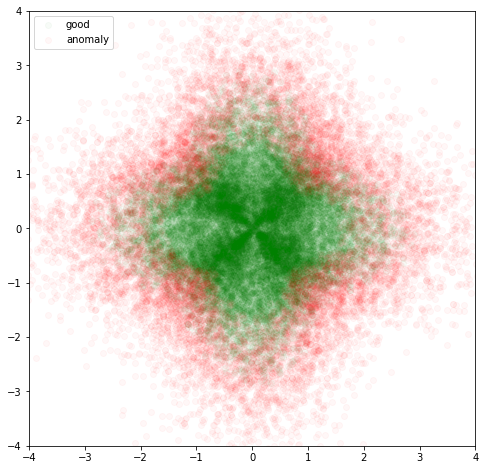

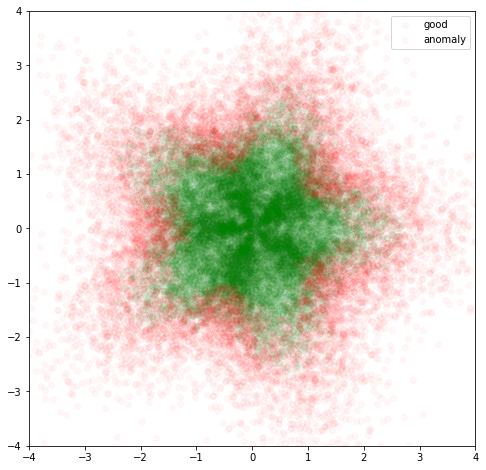

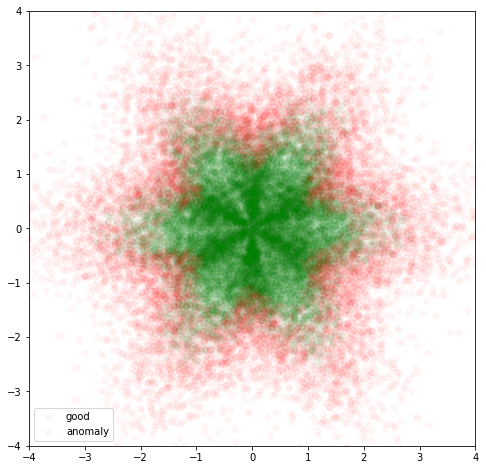

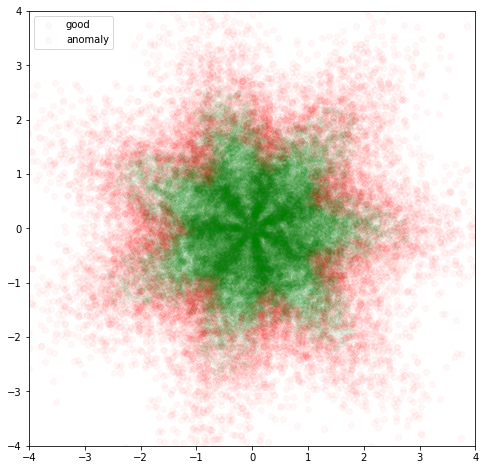

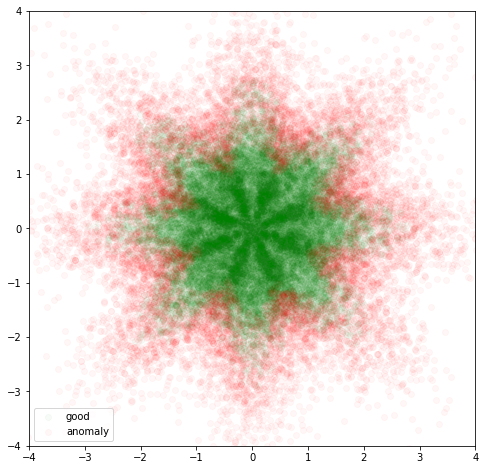

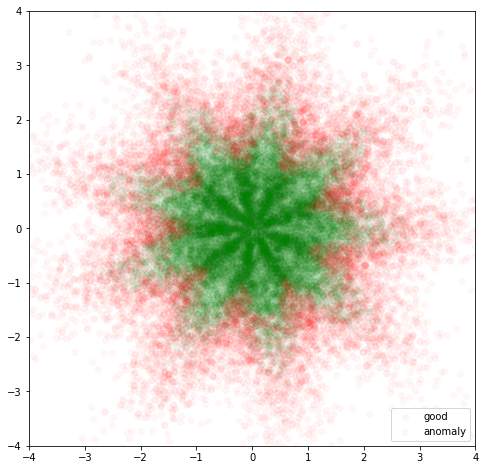

In [4]:
for p in range(0, 10):
    gen_and_plot(periods=p)